<a href="https://colab.research.google.com/github/Roko442/aroy97/blob/main/FMNIST_CNN_Aritrajit_Roy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load the Fashion MNIST Dataset

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from matplotlib import pyplot

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train,y_train),(X_test,y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
# Class names for visualization
class_names = ['T-shirt','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [ ]:
X_train , X_test = X_train/255.0 , X_test/255.0 #normalize

In [ ]:
#Reshape
X_train = X_train.reshape(-1,28,28,1)
X_test = X_test.reshape(-1,28,28,1)

Display a sample from each class

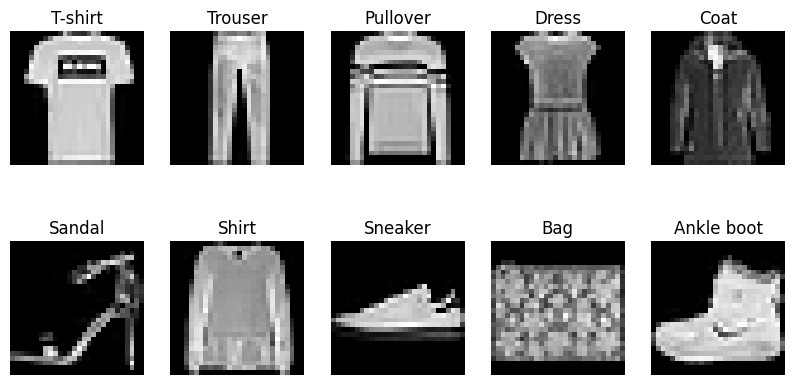

In [ ]:
fig, axes= plt.subplots(2,5,figsize=(10,5))

for i,ax in enumerate(axes.flat):
    idx = np.where(y_train == i)[0][0] #find an example from each class
    ax.imshow(X_train[idx].reshape(28,28),cmap='gray')
    ax.set_title(class_names[i])
    ax.axis('off')
plt.show()

Define the Model


In [ ]:
model = keras.Sequential([
    layers.Conv2D(32,(3,3),activation = 'relu',input_shape = (28,28,1)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3),activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64,activation = 'relu'),
    layers.Dense(10,activation = 'softmax')
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.compile(optimizer = 'adam',loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])

In [ ]:
#Print the model architechture
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 121,930 (476.29 KB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

Model Training

In [ ]:
model.fit(X_train,y_train,epochs = 5,batch_size=32,validation_data = (X_test,y_test))

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 54s 29ms/step - accuracy: 0.8947 - loss: 0.2902 - val_accuracy: 0.8852 - val_loss: 0.3235
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9046 - loss: 0.2599 - val_accuracy: 0.8775 - val_loss: 0.3469
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9115 - loss: 0.2388 - val_accuracy: 0.8901 - val_loss: 0.3093
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 82s 28ms/step - accuracy: 0.9181 - loss: 0.2187 - val_accuracy: 0.8897 - val_loss: 0.3163
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 84s 30ms/step - accuracy: 0.9219 - loss: 0.2099 - val_accuracy: 0.8934 - val_loss: 0.3163


Evaluation

In [ ]:
test_loss,test_acc = model.evaluate(X_test,y_test,verbose=0)
print(f'Test Accuracy: {test_acc*100:.2f}%')

Test Accuracy: 89.34%


Prediction on a random sample

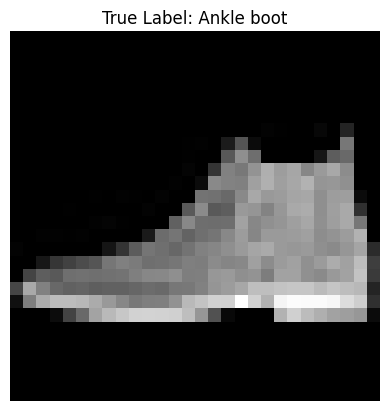

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
prediction:[[4.3713245e-12 4.0549483e-15 2.0079716e-07 2.3353319e-10 2.4815755e-10
  7.9048114e-06 1.9192814e-10 6.5412751e-04 5.9233329e-08 9.9933773e-01]]
Predicted class: Ankle boot


In [ ]:
sample_image = X_test[0].reshape(1,28,28,1)
# Display the image
plt.imshow(sample_image.reshape(28,28),cmap='gray')
plt.title(f'True Label: {class_names[y_test[0]]}')
plt.axis('off')
plt.show()
prediction = model.predict(sample_image)
print(f'prediction:{prediction}') #make a prediction
predicted_class = np.argmax(prediction)
print(f'Predicted class: {class_names[predicted_class]}')

Visualise feature maps

In [ ]:
## let's print all the layers with number, name and output shape

for i in range(len(model.layers)):
    layer = model.layers[i]
    print(i,layer.name,layer.output.shape)

0 conv2d (None, 26, 26, 32)
1 max_pooling2d (None, 13, 13, 32)
2 conv2d_1 (None, 11, 11, 64)
3 max_pooling2d_1 (None, 5, 5, 64)
4 flatten (None, 1600)
5 dense (None, 64)
6 dense_1 (None, 10)


In [ ]:
## Print only convolution layers

for i in range(len(model.layers)):
    layer = model.layers[i]
    if 'conv' not in layer.name:
        continue
    print(i,layer.name,layer.output.shape)

0 conv2d (None, 26, 26, 32)
2 conv2d_1 (None, 11, 11, 64)


Create a tiny model for feature maps visualisation

In [ ]:
tiny_model = Model(inputs = model.inputs,outputs = model.layers[0].output)
#calculating the features_maps
features = tiny_model.predict(sample_image)
print(features.shape)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 73ms/step
(1, 26, 26, 32)


/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(1, 28, 28, 1))
  warnings.warn(msg)


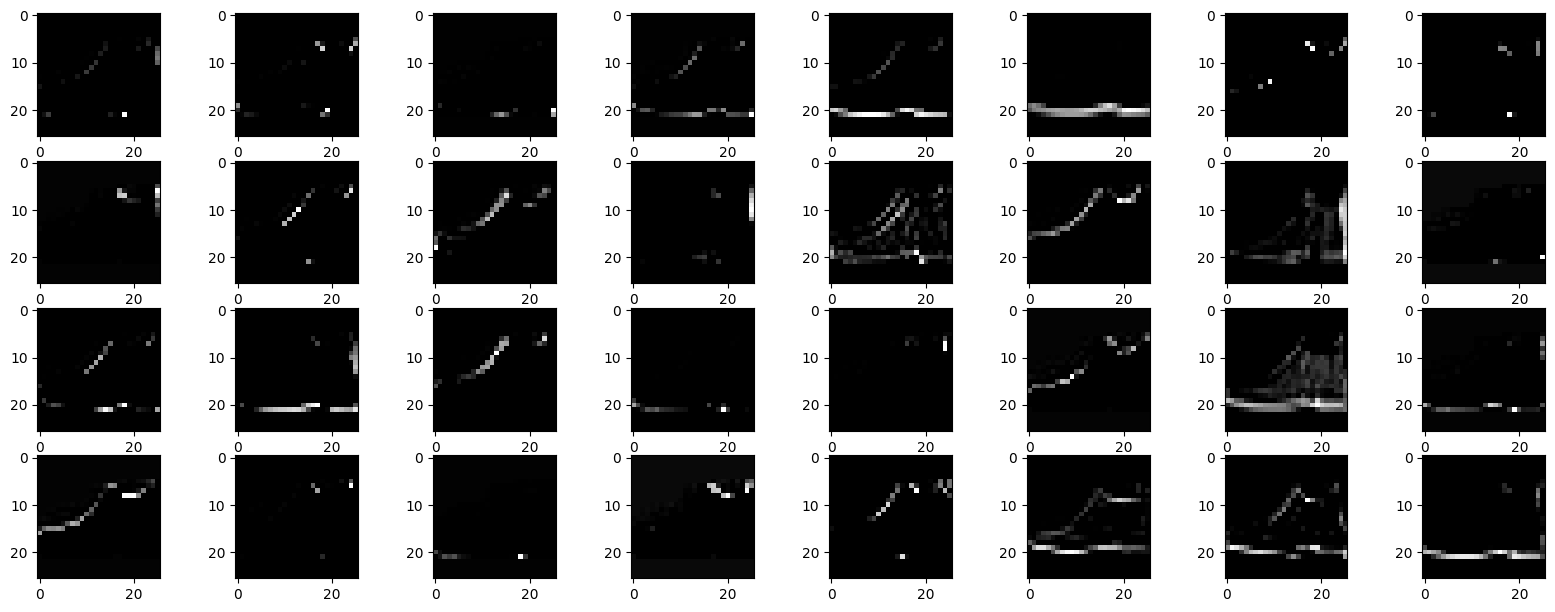

In [ ]:
fig = pyplot.figure(figsize=(20,15))
for i in range(1,features.shape[3]+1):
    pyplot.subplot(8,8,i)
    pyplot.imshow(features[0,:,:,i-1],cmap='gray')
pyplot.show()